In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [37]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


##Data preprocessing


In [6]:
data.shape

(7920, 3)

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [11]:
import re

In [12]:
import string

convert uppercase to lower case

In [8]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x.lower()for x in x.split()))

In [9]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test https://goo.gl/h1...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


Remove Links

In [14]:
data["tweet"] = data['tweet'].apply(lambda x:" ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE)for x in x.split()))

In [15]:
data.head(5)

,id,label,tweet
0,1,0,#fingerprint #pregnancy test #android #apps #...
1,2,0,finally a transparant silicon case ^^ thanks t...
2,3,0,we love this! would you go? #talk #makememorie...
3,4,0,i'm wired i know i'm george i was made that wa...
4,5,1,what amazing service! apple won't even talk to...


Remove Punctuations

In [18]:

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)


In [19]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


Remove Numbers

In [20]:
data["tweet"] = data['tweet'].str.replace('\d+','',regex=True)

In [21]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


In [22]:
data.tail(5)

,id,label,tweet
7915,7916,0,live out loud lol liveoutloud selfie smile son...
7916,7917,0,we would like to wish you an amazing day make ...
7917,7918,0,helping my lovely year old neighbor with her ...
7918,7919,0,finally got my smart pocket wifi stay connecte...
7919,7920,0,apple barcelona apple store bcn barcelona trav...


Remove Stop Words

In [23]:
!pip install nltk

In [24]:
import nltk

In [26]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
with open ('../static/model/corpora/stopwords/english','r')as file:
    sw = file.read().splitlines()

In [28]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
data["tweet"] = data["tweet"].apply(lambda x:" ".join(x for x in x.split()if x not in sw))

In [30]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


Stemmming

In [33]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))


In [34]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


Building Vocabulary

In [42]:
from collections import Counter
vocab = Counter()

In [46]:
for sentence in data ['tweet']:
    vocab.update(sentence.split())

In [47]:
vocab

Counter({'#iphone': 2077,
         'my': 1817,
         'to': 1799,
         'I': 1752,
         'the': 1703,
         '#apple': 1434,
         'a': 1217,
         'and': 1163,
         'for': 1017,
         '#samsung': 883,
         'is': 813,
         'you': 733,
         'of': 680,
         'it': 672,
         'on': 672,
         '…': 654,
         'in': 630,
         'new': 621,
         '#iPhone': 603,
         '#Apple': 592,
         '.': 578,
         'with': 539,
         'phone': 524,
         '#sony': 514,
         'me': 421,
         'iPhone': 412,
         'have': 403,
         'this': 401,
         'My': 385,
         'at': 354,
         '#Samsung': 347,
         'an': 340,
         'your': 322,
         '-': 318,
         'so': 311,
         'FOLLOW': 309,
         'RT': 307,
         '#life': 305,
         'just': 294,
         'Gain': 294,
         'that': 289,
         'Apple': 281,
         '#me': 281,
         '#photography': 278,
         'all': 277,
         '#cute

In [48]:
len(vocab)

34348

In [49]:
data.shape

(7920, 3)

In [50]:
tokens = [key for key in vocab if vocab[key]>10]

In [51]:
len(tokens)

1401

In [52]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding = "utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens,'../static/model/vocabulary.txt')

Devide Dataset for Train and Test

In [54]:
x = data['tweet']
y = data['label']

!pip install scikit-learn

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [57]:
x_train.shape

(6336,)

In [58]:
x_test.shape

(1584,)

Vectorization

In [62]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    return vectorized_lst_new


In [76]:
vectorized_x_train = vectorizer(x_train,tokens)
vectorized_x_test = vectorizer(x_test,tokens)

In [77]:
y_train.value_counts()

label
0    4699
1    1637
Name: count, dtype: int64

Handling imbalenced Dataset

In [65]:
!pip install imbalanced-learn

In [69]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()


In [80]:
vectorized_x_train_smote,y_train_smote = smote.fit_resample(vectorized_x_train,y_train)
print(vectorized_x_train_smote.shape,y_train_smote.shape)

(9398, 1401) (9398,)


In [82]:
y_train_smote.value_counts()

label
0    4699
1    4699
Name: count, dtype: int64

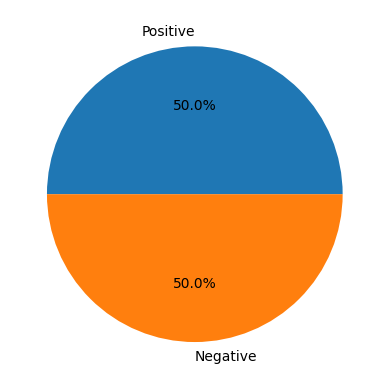

In [84]:

plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), 
        labels=['Positive', 'Negative'], 
        autopct='%1.1f%%') 
plt.show()


Model training and evaluation

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [87]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [88]:
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

LogisticRegression

In [89]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.942
	Precision = 0.918
	Recall = 0.97
	F1-Score = 0.943
Testing Scores:
	Accuracy = 0.862
	Precision = 0.683
	Recall = 0.82
	F1-Score = 0.745


Naive bayes

In [90]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.896
	Precision = 0.846
	Recall = 0.967
	F1-Score = 0.903
Testing Scores:
	Accuracy = 0.854
	Precision = 0.636
	Recall = 0.949
	F1-Score = 0.762


Decision tree

In [91]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.818
	Precision = 0.641
	Recall = 0.591
	F1-Score = 0.615


Random Forest

In [92]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 0.999
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.874
	Precision = 0.743
	Recall = 0.743
	F1-Score = 0.743


Support vecter machine

In [93]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.978
	Precision = 0.964
	Recall = 0.993
	F1-Score = 0.979
Testing Scores:
	Accuracy = 0.881
	Precision = 0.738
	Recall = 0.802
	F1-Score = 0.768


In [94]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)